# Feature Analysis

In [1]:
import numpy as np

x_data_all = np.load("x_data_handcraft.npy")
y_label_all = np.load("y_label_handcraft.npy")
y_uid_all = np.load("y_uid_handcraft.npy")

label_dict = {
    "covidandroidcorrectnosymp": 1,
    "covidandroidcorrectwithcough": 2,
    "covidwebcorrectnosymp": 3,
    "covidwebcorrectwithcough": 4,
    "healthyandroidnosymp": -1,
    "healthyandroidwithcough": -2,
    "healthywebnosymp": -3,
    "healthywebwithcough": -4,
    "asthmaandroidnosymp": 5,
    "asthmaandroidwithcough": 6,
    "asthmawebnosymp": 7,
    "asthmawebwithcough": 8,
}


x_data_all_1 = x_data_all[y_label_all == 1]  #covidandroidnocough
x_data_all_2 = x_data_all[y_label_all == 2]  #covidandroidwithcough
x_data_all_3 = x_data_all[y_label_all == 3]  #covidwebnocough
x_data_all_4 = x_data_all[y_label_all == 4]  #covidwebwithcough
x_data_all_6 = x_data_all[y_label_all == 6]  #asthmaandroidwithcough
x_data_all_8 = x_data_all[y_label_all == 8]  #asthmawebwithcough
x_data_all_m1 = x_data_all[y_label_all == -1] #healthyandroidnosymp
x_data_all_m2 = x_data_all[y_label_all == -2] #healthyandroidwithcough
x_data_all_m3 = x_data_all[y_label_all == -3] #healthywebnosymp
x_data_all_m4 = x_data_all[y_label_all == -4] #healthywebwithcough

y_label_all_1 = y_label_all[y_label_all == 1]
y_label_all_2 = y_label_all[y_label_all == 2]
y_label_all_3 = y_label_all[y_label_all == 3]
y_label_all_4 = y_label_all[y_label_all == 4]
y_label_all_6 = y_label_all[y_label_all == 6]
y_label_all_8 = y_label_all[y_label_all == 8]
y_label_all_m1 = y_label_all[y_label_all == -1]
y_label_all_m2 = y_label_all[y_label_all == -2]
y_label_all_m3 = y_label_all[y_label_all == -3]
y_label_all_m4 = y_label_all[y_label_all == -4]

y_uid_1 = y_uid_all[y_label_all == 1]
y_uid_2 = y_uid_all[y_label_all == 2]
y_uid_3 = y_uid_all[y_label_all == 3]
y_uid_4 = y_uid_all[y_label_all == 4]
y_uid_6 = y_uid_all[y_label_all == 6]
y_uid_8 = y_uid_all[y_label_all == 8]
y_uid_m1 = y_uid_all[y_label_all == -1]
y_uid_m2 = y_uid_all[y_label_all == -2]
y_uid_m3 = y_uid_all[y_label_all == -3]
y_uid_m4 = y_uid_all[y_label_all == -4]


In [2]:

# covid and healthy
x_data_all_task = np.concatenate(
    (
        x_data_all_1,
        x_data_all_2,
        x_data_all_3,
        x_data_all_4,
        x_data_all_m1,
        x_data_all_m3,
    ),
    axis=0,
)
y_label_all_task = np.concatenate(
    (
        y_label_all_1,
        y_label_all_2,
        y_label_all_3,
        y_label_all_4,
        y_label_all_m1,
        y_label_all_m3,
    ),
    axis=0,
)
y_uid_all_task = np.concatenate(
    (y_uid_1, y_uid_2, y_uid_3, y_uid_4, y_uid_m1, y_uid_m3), axis=0
)

y_label_all_task[y_label_all_task > 0] = 1
y_label_all_task[y_label_all_task < 0] = 0


Sample level:
    Duration
	Tempo
	Oneset
	Period
Frame Level:
	RMS
	Centriod
	Rolloff
	ZCR
	MFCC
	MFCC_delta
	MFCC_delta2

In [3]:
import matplotlib

matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

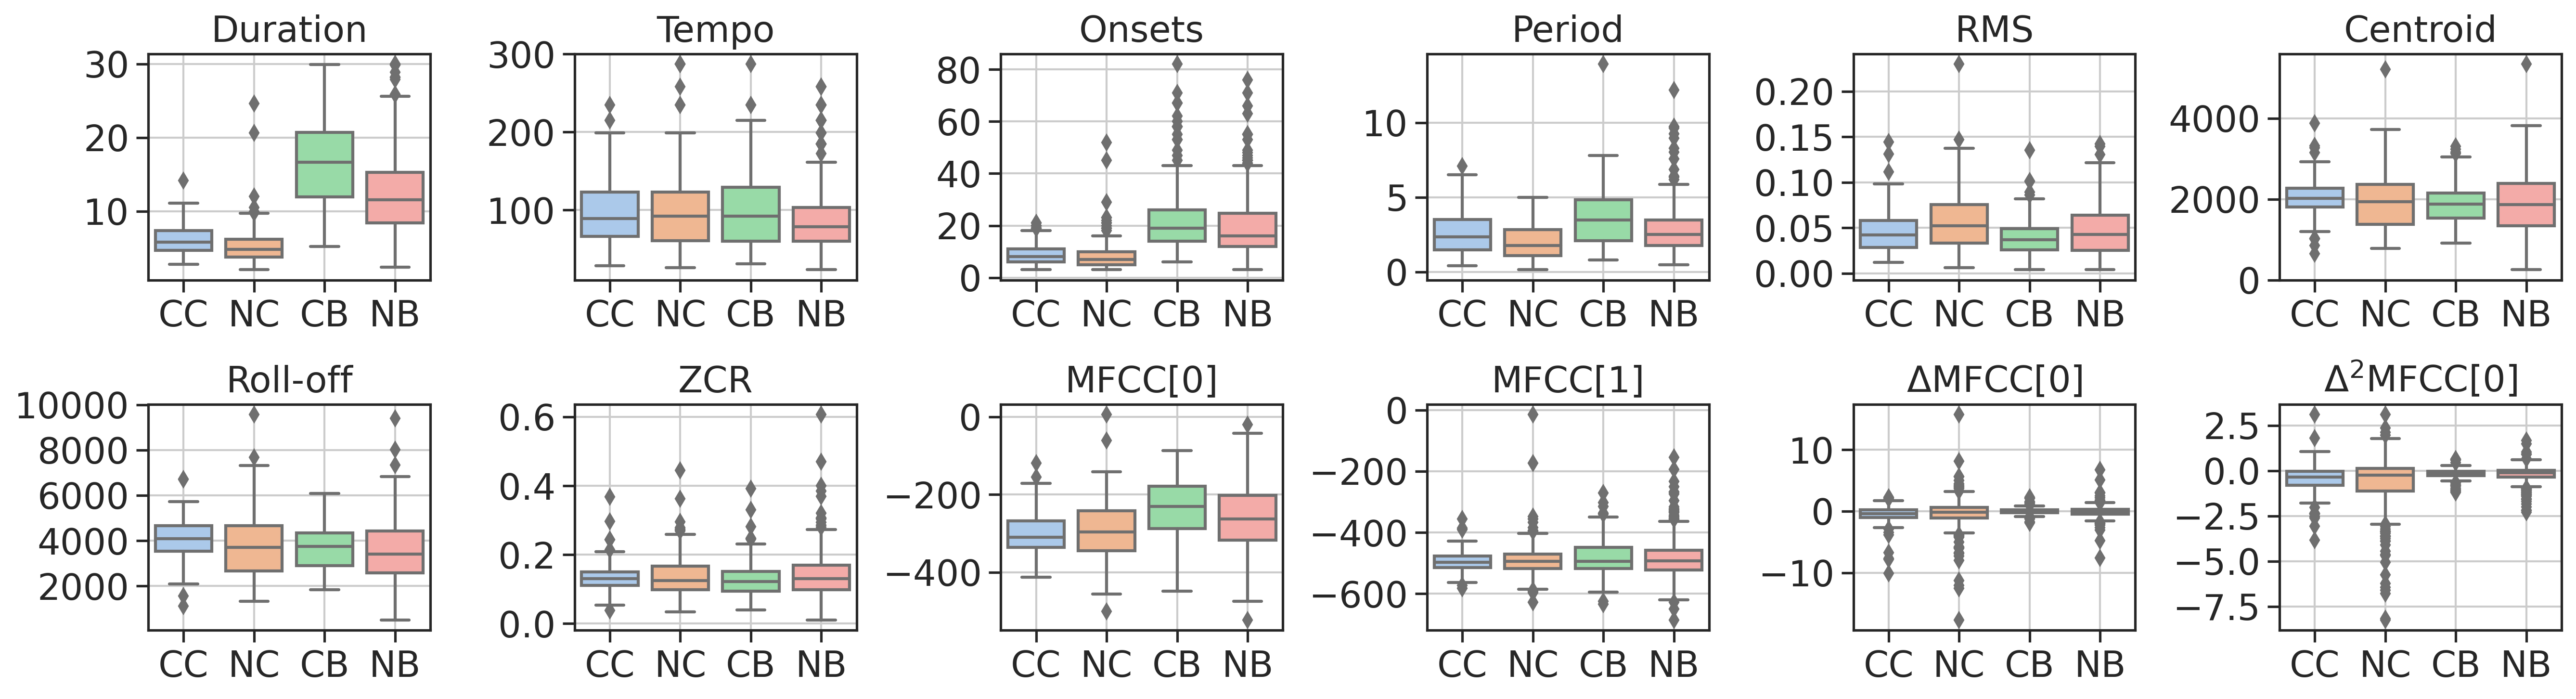

In [4]:
import seaborn as sns

sns.set(style="ticks", palette="pastel")
import matplotlib.pyplot as plt

C = 477

breath = np.zeros([x_data_all_task.shape[0], x_data_all_task.shape[1]])
breath[:, C : C * 2] = x_data_all_task[:, :C]
y_breath = y_label_all_task + 3

x_plot = np.concatenate((x_data_all_task, breath), axis=0)
y_plot = np.concatenate((y_label_all_task, y_breath), axis=0)

imp_feat_label_dict = {1: "CC", 0: "NC", 4: "CB", 3: "NB"}
import pandas as pd

data = {
    "label": [imp_feat_label_dict[i] for i in list(y_plot)],
    "f1": list(x_plot[:, 0 + C]),
    "f2": list(x_plot[:, 1 + C]),
    "f3": list(x_plot[:, 2 + C]),
    "f4": list(x_plot[:, 3 + C]),
    "f5": list(x_plot[:, 4 + C]),
    "f6": list(x_plot[:, 15 + C]),
    "f7": list(x_plot[:, 26 + C]),
    "f8": list(x_plot[:, 37 + C]),
    "f9": list(x_plot[:, 48 + C]),
    "f10": list(x_plot[:, 49 + C]),
    "f11": list(x_plot[:, 191 + C]),
    "f12": list(x_plot[:, 334 + C]),
}
frame = pd.DataFrame(data)


name = [
    "Duration",
    "Tempo",
    "Onsets",
    "Period",
    "RMS",
    "Centroid",
    "Roll-off",
    "ZCR",
    "MFCC[0]",
    "MFCC[1]",
    "$\Delta$MFCC[0]",
    "$\Delta^2$MFCC[0]",
]
plt.figure(dpi=300, figsize=(18, 5))
for i in range(1, 13):
    plt.subplot(2, 6, i)
    yy = "f" + str(i)
    sns.boxplot(x="label", y=yy, data=data)
    plt.title(name[i - 1], fontsize=18)
    plt.xticks(fontsize=18, rotation=0)
    plt.yticks(fontsize=18)
    plt.grid()
    plt.tight_layout()
plt.show()
# plt.savefig('features_task1_font.pdf')

